In [5]:
#!/usr/bin/env python3
###-----------------------------------------------------------##
#@author narumeena
#@description -applying bayesian optimization on random forest 
#             -using hyperopt library 
###-----------------------------------------------------------##

In [6]:
#import libraries 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split # split the dataset into traninig and testing dataset 

from sklearn.ensemble.forest import RandomForestClassifier# to import the random forest Model 
from sklearn.metrics import roc_curve, auc                # to import roc curve abd auc metrics for evaluation 
#from sklearn.grid_search import GridSearchCV              # grid search is used for hyperparameters-optimization
from sklearn.model_selection import KFold                # cross validation using the kfold algorithm
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials     # library for hyperparameters-optimization
from sklearn.model_selection import cross_val_score

import seaborn as sns                                     # Python graphing library
import matplotlib.pyplot as plt
%matplotlib inline

/home/narumeena/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
#import data from filterd dataset with maximum 30% files 
filtredAttributes = pd.read_csv("../analysis/trainingDataSet/case_control_filtred.csv", sep=",")
filtredAttributes.shape

(138665, 74)

In [8]:
filtredAttributes.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [9]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

GC                                  0
CpG                                 0
minDistTSS                          0
minDistTSE                          0
priPhCons                         143
mamPhCons                         143
verPhCons                         143
priPhyloP                         143
mamPhyloP                         143
verPhyloP                         143
bStatistic                       1058
cHmm_E1                             0
cHmm_E2                             0
cHmm_E3                             0
cHmm_E4                             0
cHmm_E5                             0
cHmm_E6                             0
cHmm_E7                             0
cHmm_E8                             0
cHmm_E9                             0
cHmm_E10                            0
cHmm_E11                            0
cHmm_E12                            0
cHmm_E13                            0
cHmm_E14                            0
cHmm_E15                            0
cHmm_E16    

In [10]:
#missing values 

filtredAttributes['priPhCons'].fillna(0.115,inplace=True)
filtredAttributes['mamPhCons'].fillna(0.079,inplace=True)
filtredAttributes['verPhCons'].fillna(0.094,inplace=True)
filtredAttributes['priPhyloP'].fillna(-0.033,inplace=True)
filtredAttributes['mamPhyloP'].fillna(-0.038,inplace=True)
filtredAttributes['verPhyloP'].fillna(0.017,inplace=True)
filtredAttributes['bStatistic'].fillna(800.261,inplace=True)
filtredAttributes['minDistTSS'].fillna(10000000,inplace=True)
filtredAttributes['minDistTSE'].fillna(10000000,inplace=True)
filtredAttributes['RemapOverlapTF'].fillna(0.5,inplace=True)
filtredAttributes['EncodeH3K4me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K4me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K9me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27ac-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K27me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K36me3-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH3K79me2-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH4K20me1-max'].fillna(0,inplace=True)
filtredAttributes['EncodeH2AFZ-max'].fillna(0,inplace=True)
filtredAttributes['EncodetotalRNA-max'].fillna(0,inplace=True)
filtredAttributes['EncodeDNase-max'].fillna(0,inplace=True)

In [11]:
pd.options.display.max_rows = 4000
filtredAttributes.isnull().sum()

GC                              0
CpG                             0
minDistTSS                      0
minDistTSE                      0
priPhCons                       0
mamPhCons                       0
verPhCons                       0
priPhyloP                       0
mamPhyloP                       0
verPhyloP                       0
bStatistic                      0
cHmm_E1                         0
cHmm_E2                         0
cHmm_E3                         0
cHmm_E4                         0
cHmm_E5                         0
cHmm_E6                         0
cHmm_E7                         0
cHmm_E8                         0
cHmm_E9                         0
cHmm_E10                        0
cHmm_E11                        0
cHmm_E12                        0
cHmm_E13                        0
cHmm_E14                        0
cHmm_E15                        0
cHmm_E16                        0
cHmm_E17                        0
cHmm_E18                        0
cHmm_E19      

In [12]:
# One-hot encode the data using pandas get_dummies
filtredAttributes = pd.get_dummies(filtredAttributes)

In [13]:
# Labels are the values we want to predict
labels = filtredAttributes['category']
labels

0         1
1         1
2         1
3         1
4         1
         ..
138660    0
138661    0
138662    0
138663    0
138664    0
Name: category, Length: 138665, dtype: int64

In [14]:
# Remove the labels from the features
# axis 1 refers to the columns
features= filtredAttributes.drop('category', axis = 1)
features.head()

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
0,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,0,0,1,0,0,0
1,0.715,0.253,6715,185,0.011,0.001,0.0,-0.646,0.096,0.126,...,0,0,0,0,1,0,0,0,0,0
2,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,1,0,0,0,0,0,0
3,0.609,0.120,212,2176,0.039,0.984,1.0,0.595,4.158,5.651,...,0,0,0,0,0,0,0,0,0,1
4,0.675,0.213,814,1969,0.192,0.999,1.0,-1.149,0.850,3.250,...,0,0,0,1,0,0,0,0,0,0


In [15]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.25, random_state = 100)

In [16]:
X_train

,GC,CpG,minDistTSS,minDistTSE,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,...,Consequence_DOWNSTREAM,Consequence_INTRONIC,Consequence_NONCODING_CHANGE,Consequence_NON_SYNONYMOUS,Consequence_REGULATORY,Consequence_SPLICE_SITE,Consequence_STOP_GAINED,Consequence_STOP_LOST,Consequence_SYNONYMOUS,Consequence_UPSTREAM
42192,0.596,0.067,20,10,0.980,0.985,1.000,0.595,2.963,7.708,...,0,0,0,0,0,0,0,0,0,1
46590,0.391,0.013,1915,1832,0.963,1.000,1.000,0.475,3.370,8.687,...,0,0,0,1,0,0,0,0,0,0
78842,0.483,0.013,110247,414677,0.002,0.000,0.000,0.418,-0.820,-0.780,...,0,1,0,0,0,0,0,0,0,0
48882,0.464,0.053,952,306,0.979,0.998,1.000,0.595,1.325,4.270,...,0,0,0,0,0,0,0,0,0,1
33305,0.636,0.027,285,450,0.954,1.000,1.000,0.595,4.396,8.427,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,0.384,0.000,33269,92255,0.032,0.000,0.000,0.475,-0.733,-0.731,...,0,1,0,0,0,0,0,0,0,0
65615,0.464,0.013,22224,17929,0.000,0.000,0.000,-0.393,-1.784,-1.712,...,0,1,0,0,0,0,0,0,0,0
77655,0.424,0.013,2194,687,0.112,0.957,0.998,-1.347,0.129,0.894,...,0,0,0,0,0,0,0,0,0,1
56088,0.530,0.053,669,90,0.212,0.376,1.000,0.391,2.680,7.282,...,0,1,0,0,0,0,0,0,0,0


In [17]:
Y_train

42192    1
46590    1
78842    0
48882    1
33305    1
        ..
82270    0
65615    0
77655    0
56088    1
38408    1
Name: category, Length: 103998, dtype: int64

In [18]:
#Function for model performance using AUC
def performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest without hyper parameter optimisation



In [19]:
rf0=RandomForestClassifier()

In [20]:
rf0.fit(X=X_train,y=Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

the AUC is : 0.9994


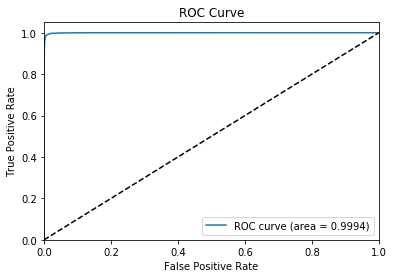

In [21]:
performance(Model=rf0,Y=Y_test,X=X_test)

In [22]:
client = pymongo.MongoClient(host="mongodb://localhost:1234")

# Random Forest using hyperopt

In [23]:
from hyperopt.mongoexp import MongoTrials
import pymongo

In [ ]:
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, Y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(0,150)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = MongoTrials('mongo://localhost:1234/foo_db/jobs', exp_key='exp1')
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

no last_id found, re-trying


 79%|███████▉  | 79/100 [13:45<04:33, 13.00s/trial, best loss: nan] 

In [ ]:
rf1=RandomForestClassifier(max_features=113, n_estimators=498, criterion= 'entropy', max_depth=2,random_state=1)

In [ ]:
rf1.fit(X=X_train,y=Y_train)

In [ ]:
performance(Model=rf1,Y=Y_test,X=X_test)

# calculating classification accuracy